### Problem

Can you predict if a candy is chocolate or not based on its other features?

### 1. Importing Libraries


In [463]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score,precision_score,f1_score
import numpy as np

### 2. Loading and Exploring the Data

In [355]:
df = pd.read_csv('data/candy-data.csv')

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


#### Heatmap of correlation beetween features 

<Axes: >

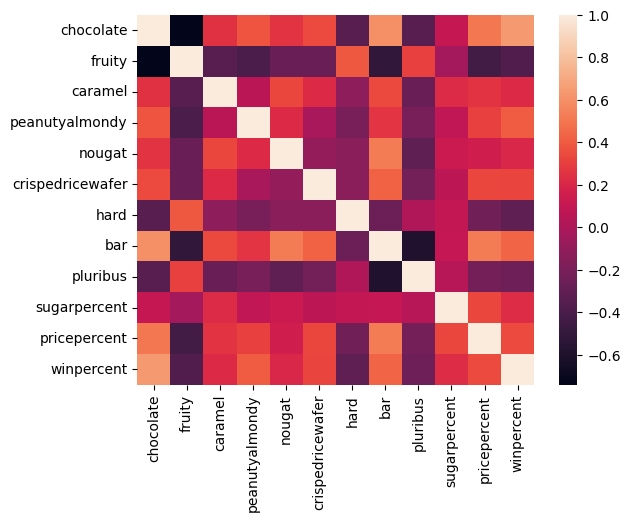

In [357]:
sns.heatmap(df.drop(columns='competitorname').corr())

### 3. Data Cleaning and Preparation

In [358]:
df_1 = df.drop(columns='competitorname')

### 4. Model Building and Training


#### Splitting data

In [359]:
x = df_1.drop(columns='chocolate')
y = df_1['chocolate']

In [360]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [381]:
model = LogisticRegression(solver='lbfgs',C= 0.5,random_state=0)
model.fit(x_train,y_train)
predictions = model.predict(x_test)

In [382]:
data = {'features':model.feature_names_in_,
        'coef_':model.coef_.reshape(-1,1).flatten()}

pd.DataFrame(data)

,features,coef_
0,fruity,-1.613351
1,caramel,0.085124
2,peanutyalmondy,0.041618
3,nougat,0.038964
4,crispedricewafer,0.301788
5,hard,-0.313968
6,bar,0.722614
7,pluribus,-0.268664
8,sugarpercent,0.036052
9,pricepercent,0.284381


### 6. Model Evaluation

In [383]:
def check_prob(y_test,predictions):
    data = {
        'true': y_test,
        'predict':predictions,
    }

    temp_1 = pd.DataFrame(data).reset_index(drop=True)
    temp_2 = pd.DataFrame(model.predict_proba(x_test),columns=['prob_to_0','prob_to_1'])

    return pd.concat([temp_1,temp_2],axis=1)

In [384]:
check_prob(y_test,predictions)

,true,predict,prob_to_0,prob_to_1
0,0,0,0.875229,0.124771
1,0,0,0.926599,0.073401
2,0,0,0.927480,0.072520
3,0,0,0.800191,0.199809
4,0,0,0.833337,0.166663
5,0,0,0.956184,0.043816
6,0,0,0.961652,0.038348
7,1,0,0.664724,0.335276
8,0,0,0.962960,0.037040
9,1,1,0.038306,0.961694


In [488]:
print(confusion_matrix(y_test,predictions))
print('precision: ',precision_score(y_test,predictions))
print('f1_score: ',f1_score(y_test,predictions))
print('recall_score: ',recall_score(y_test,predictions))

[[15  0]
 [ 3  8]]
precision:  1.0
f1_score:  0.8421052631578947
recall_score:  0.7272727272727273
